<h1>HW2 - Convolutional Neural Networks- Practical Q1_Part A</h1>
<h3><font color=yellow>Total Points: 100</font></h3>



<font color=greeen>Please, name this file as HW2_Q1_{Student_ID}.ipynb</font>

<h2>Full Name: Javad Razi Giglou</h2>
<h2>Student ID: 401204354</h2>

#Imports

In [1]:
import os
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
import torch.nn as nn
from torch.nn import functional as F
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

#Preparing Data

In [2]:
%%capture
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################

import torch
import torchvision
import torchvision.transforms as transforms

# Define the transforms (converting images to tensor and normalizing)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

## Download Fashion-MNIST dataset
train_set = torchvision.datasets.FashionMNIST(root='./data_q1', train=True, download=True, transform=transform)
test_set = torchvision.datasets.FashionMNIST(root='./data_q1', train=False, download=True, transform=transform)

#################################################################################
#                            """"  5 Points  """"
#################################################################################

In [3]:
# Using GPU if it's available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################

from torch.utils.data import random_split

# Split training set into train and validation data
torch.manual_seed(42)

# Set the sizes for train and validation sets
train_size = int(0.8 * len(train_set))
val_size = len(train_set) - train_size

# Use random_split to split the dataset
train_ds, val_ds = random_split(train_set, [train_size, val_size])

#################################################################################
#                            """"  5 Points  """"
#################################################################################

In [4]:
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################

from torch.utils.data import DataLoader

# Set your desired batch size
batch_size = 64

# Create DataLoader for training set with shuffling
train_dataloader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

# Create DataLoader for validation set
val_dataloader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

# Create DataLoader for test set
test_dataloader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

# Get the list of classes from the training set
classes = train_set.classes

#################################################################################
#                            """"  5 Points  """"
#################################################################################

#Visualizing a few data samples

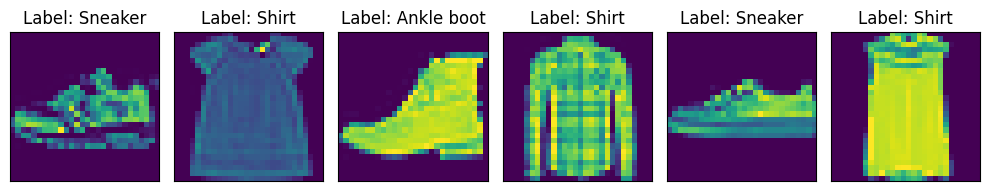

In [5]:
# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})
for i,ax in zip(range(0,6),axes.flat):
    img,label=images[i],labels[i]
    ax.imshow(img.permute(1, 2, 0))
    ax.set_title(f"Label: {classes[label]}")

plt.tight_layout()
plt.show()

#Building Model Arcitechture

<h2>Implement the Convolutional Neural Network shown below:</h2>

<img src='https://drive.google.com/uc?id=1eN-rEyMCmApg7tASsmtkBQM7HbU1ZORH'>

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

class Simple_CNN(nn.Module):
    def __init__(self):
        super(Simple_CNN, self).__init__()
        #################################################################################
        #                          COMPLETE THE FOLLOWING SECTION                       #
        #################################################################################
        """ Defining layers """
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding='same')
        self.batch_norm1 = nn.BatchNorm2d(32)
        self.maxpool1 = nn.MaxPool2d(2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding='same')
        self.batch_norm2 = nn.BatchNorm2d(64)
        self.maxpool2 = nn.MaxPool2d(2)

        # Adjusting the size after maxpool2 to match the input to the fully connected layer
        self.fc1 = nn.Linear(64 * 7 * 7, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)
        #################################################################################
        #                           """"  15 Points  """"
        #################################################################################

    def forward(self, x):
        #################################################################################
        #                          COMPLETE THE FOLLOWING SECTION                       #
        #################################################################################
        """ Implement the forward propagation steps """
        #Your Code Here
        x = F.relu(self.batch_norm1(self.conv1(x)))
        x = self.maxpool1(x)

        x = F.relu(self.batch_norm2(self.conv2(x)))
        x = self.maxpool2(x)

        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        out = self.fc3(x)
        #################################################################################
        #                           """"  10 Points  """"
        #################################################################################
        return out

    def Fit(self, num_epochs, train_loader, val_loader, optimizer, criterion):
        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []

        for epoch in range(num_epochs):
            train_per_epoch_loss = 0
            train_data_total = 0
            train_data_correct = 0

            ####### Training Phase ########
            self.train()
            with tqdm(train_loader, unit="batch") as batches:
                epoch_loss = 0
                for images, labels in batches:
                    batches.set_description(f"Epoch {epoch + 1}")
                    #################################################################################
                    #                          COMPLETE THE FOLLOWING SECTION                       #
                    #################################################################################
                    """ Implement training steps """
                    #Your Code Here
                    optimizer.zero_grad()
                    images, labels = images.to(device), labels.to(device)

                    predictions = self(images)
                    loss = criterion(predictions, labels)

                    loss.backward()
                    optimizer.step()

                    train_data_correct += (torch.argmax(predictions, 1) == labels).sum().item()
                    train_data_total += labels.size(0)
                    train_per_epoch_loss += loss.item()
                    #################################################################################
                    #                           """"  15 Points  """"
                    #################################################################################
                    batches.set_postfix(train_loss=(train_per_epoch_loss / len(train_loader)),
                                        train_accuracy=(train_data_correct * 100 / train_data_total))
                    # show loss and accuracy per batch of data

            train_accuracy = train_data_correct * 100 / train_data_total
            train_accuracies.append(train_accuracy)
            train_losses.append(train_per_epoch_loss / len(train_loader))

            ####### Validation Phase ########
            val_per_epoch_loss = 0
            val_data_total = 0
            val_data_correct = 0

            self.eval()
            with torch.no_grad():
                for images, labels in val_loader:
                    #################################################################################
                    #                          COMPLETE THE FOLLOWING SECTION                       #
                    #################################################################################
                    """ Implement Validation steps """
                    #Your Code Here
                    images, labels = images.to(device), labels.to(device)
                    predictions = self(images)
                    val_data_correct += (torch.argmax(predictions, 1) == labels).sum().item()
                    val_data_total += labels.size(0)
                    val_per_epoch_loss += criterion(predictions, labels).item()
                    #################################################################################
                    #                           """"  15 Points  """"
                    #################################################################################

            val_accuracy = val_data_correct * 100 / val_data_total
            val_losses.append(val_per_epoch_loss / len(val_loader))
            val_accuracies.append(val_accuracy)

            print(f"End of Epoch {epoch + 1}: Validation accuracy: {val_accuracy}, "
                  f"Validation Loss: {val_per_epoch_loss / len(val_loader)}")
            print("-" * 40)

        self.history = {
            'train_losses': train_losses,
            'val_losses': val_losses,
            'train_accuracies': train_accuracies,
            'val_accuracies': val_accuracies
        }
        return self.history


In [40]:
model = Simple_CNN()
model.to(device)
print(model)

Simple_CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (batch_norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (batch_norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)


#Training the model

In [41]:
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################
import torch.optim as optim

num_epochs = 10
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
#################################################################################
#                              """"  10 Points  """"
#################################################################################
history = model.Fit(num_epochs, train_dataloader, val_dataloader, optimizer, criterion)

Epoch 1: 100%|██████████| 750/750 [00:19<00:00, 38.35batch/s, train_accuracy=84.6, train_loss=0.433]


End of Epoch 1: Validation accuracy: 89.08333333333333, Validation Loss: 0.31063563226068275
----------------------------------------


Epoch 2: 100%|██████████| 750/750 [00:19<00:00, 38.01batch/s, train_accuracy=89.7, train_loss=0.281]


End of Epoch 2: Validation accuracy: 89.85833333333333, Validation Loss: 0.2831167428100363
----------------------------------------


Epoch 3: 100%|██████████| 750/750 [00:19<00:00, 37.85batch/s, train_accuracy=91.2, train_loss=0.241]


End of Epoch 3: Validation accuracy: 90.40833333333333, Validation Loss: 0.27202082415448225
----------------------------------------


Epoch 4: 100%|██████████| 750/750 [00:19<00:00, 37.88batch/s, train_accuracy=92.2, train_loss=0.213]


End of Epoch 4: Validation accuracy: 90.93333333333334, Validation Loss: 0.25059078379157695
----------------------------------------


Epoch 5: 100%|██████████| 750/750 [00:19<00:00, 38.03batch/s, train_accuracy=92.7, train_loss=0.196]


End of Epoch 5: Validation accuracy: 91.15, Validation Loss: 0.2461190857983967
----------------------------------------


Epoch 6: 100%|██████████| 750/750 [00:19<00:00, 37.79batch/s, train_accuracy=93.5, train_loss=0.175]


End of Epoch 6: Validation accuracy: 91.78333333333333, Validation Loss: 0.22710722219198942
----------------------------------------


Epoch 7: 100%|██████████| 750/750 [00:20<00:00, 36.57batch/s, train_accuracy=94.1, train_loss=0.16]


End of Epoch 7: Validation accuracy: 91.74166666666666, Validation Loss: 0.23856598669861226
----------------------------------------


Epoch 8: 100%|██████████| 750/750 [00:19<00:00, 37.98batch/s, train_accuracy=94.7, train_loss=0.143]


End of Epoch 8: Validation accuracy: 91.75833333333334, Validation Loss: 0.2420489575238304
----------------------------------------


Epoch 9: 100%|██████████| 750/750 [00:19<00:00, 38.69batch/s, train_accuracy=95.1, train_loss=0.128]


End of Epoch 9: Validation accuracy: 91.04166666666667, Validation Loss: 0.2687810304019838
----------------------------------------


Epoch 10: 100%|██████████| 750/750 [00:20<00:00, 37.27batch/s, train_accuracy=95.7, train_loss=0.114]


End of Epoch 10: Validation accuracy: 91.93333333333334, Validation Loss: 0.2500082239151952
----------------------------------------


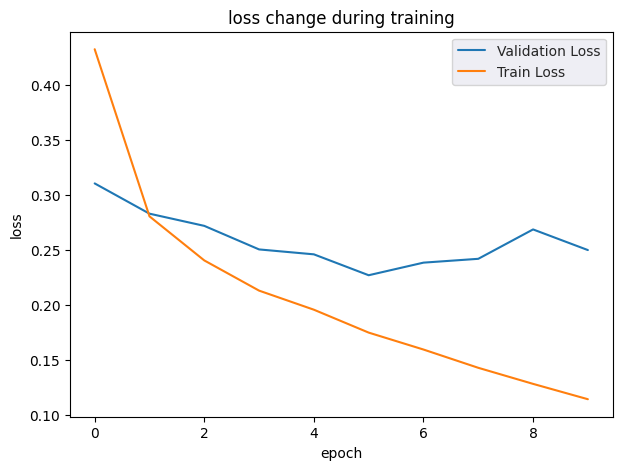

In [42]:
# plot losses
plt.subplots(figsize=(7, 5))
sns.set_style("dark")
sns.lineplot(data=history['val_losses'],label="Validation Loss")
sns.lineplot(data=np.asarray(history['train_losses']),label="Train Loss").set(title="loss change during training", xlabel="epoch", ylabel="loss")
plt.legend()
plt.show()

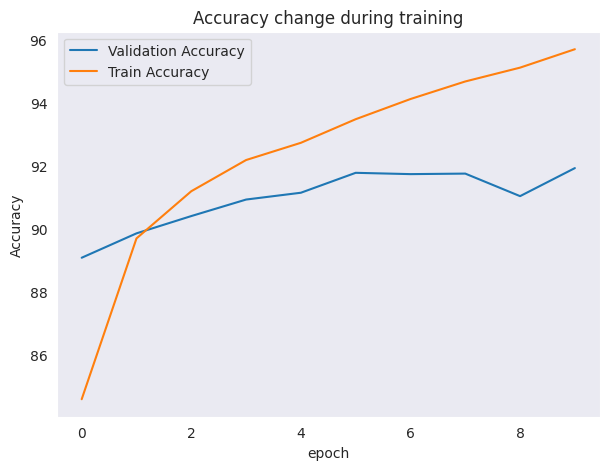

In [43]:
# plot Accuracy
plt.subplots(figsize=(7, 5))
sns.set_style("dark")
sns.lineplot(data=history['val_accuracies'],label="Validation Accuracy")
sns.lineplot(data=np.asarray(history['train_accuracies']),label="Train Accuracy").set(title="Accuracy change during training", xlabel="epoch", ylabel="Accuracy")
plt.legend()
plt.show()

# Prediction on Test Data

In [44]:
def predict(images, model):
    #################################################################################
    #                          COMPLETE THE FOLLOWING SECTION                       #
    #################################################################################
    # Set the model to evaluation mode
    model.eval()

    # Move the images to the device used during training
    images = images.to(device)

    # Make predictions
    with torch.no_grad():
        predictions = model(images)

    # Get the predicted class for each image
    _, predicted = torch.max(predictions, 1)

    #################################################################################
    #                              """"  10 Points  """"
    #################################################################################

    return predicted


**Accuracy Result on Test Data**

In [45]:
correct = 0
total = 0
y_pred_list = []
y_true_list = []

with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        # Use the predict function to get predicted labels
        predicted = predict(images, model)

        #################################################################################
        #                          COMPLETE THE FOLLOWING SECTION                       #
        #################################################################################
        # Count the total number of labels
        total += labels.size(0)

        # Count the number of correct predictions
        correct += (predicted == labels).sum().item()

#################################################################################
#                              """"  10 Points  """"
#################################################################################

        # Append the predicted and true labels to the lists
        for x in predicted.cpu().numpy():
            y_pred_list.append(x)
        for x in labels.cpu().numpy():
            y_true_list.append(x)

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


Accuracy of the network on the 10000 test images: 90 %


**Classification report**

In [46]:
print(classification_report(y_true_list, y_pred_list, target_names=classes))

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.82      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.85      0.87      0.86      1000
       Dress       0.93      0.89      0.91      1000
        Coat       0.82      0.89      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.75      0.76      0.75      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



<Axes: >

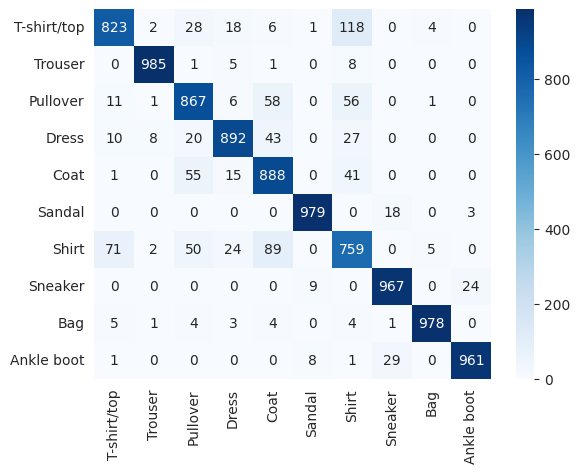

In [47]:
cf_matrix = confusion_matrix(y_true_list, y_pred_list)
sns.heatmap(cf_matrix, xticklabels=classes, yticklabels=classes, annot=True, cmap='Blues', fmt='g')

**Displaying a random set of images from test data**

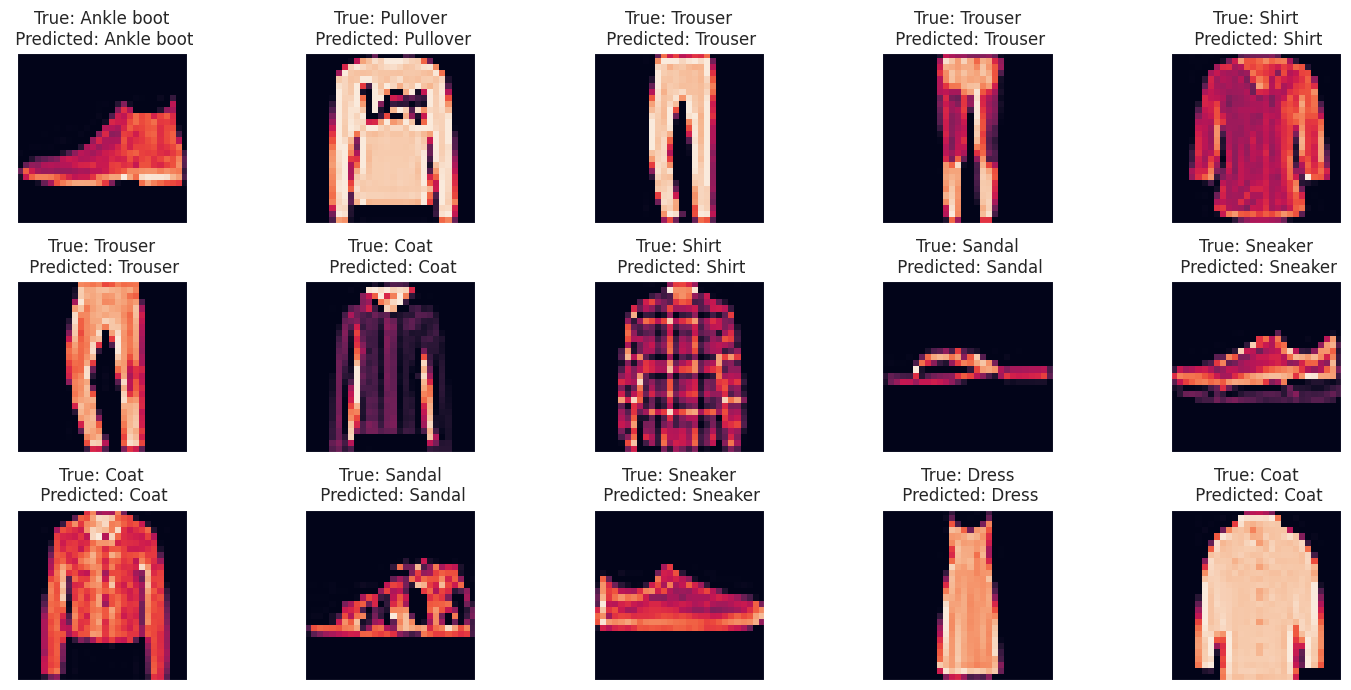

In [48]:
dataiter = iter(test_dataloader)
images, labels = next(dataiter)
predicted=predict(images, model)

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 7), subplot_kw={'xticks': [], 'yticks': []})
for i,ax in zip(range(0,16),axes.flat):
    img,label=images[i],labels[i]
    pred=predicted[i]
    ax.imshow(img.permute(1, 2, 0))
    ax.set_title(f"True: {classes[label]}\n Predicted: {classes[pred]}")

plt.tight_layout()
plt.show()